In [8]:
from TDSLib import CIRD
import numpy as np


In [9]:
cird_filename = 'mar21_18.c02'

dwell_time = 0.2
npts = 50
%store -r sensitivity
beam_start_time = 57
beam_stop_time = np.nan

area_high = False


In [10]:
cird = CIRD(cird_filename)

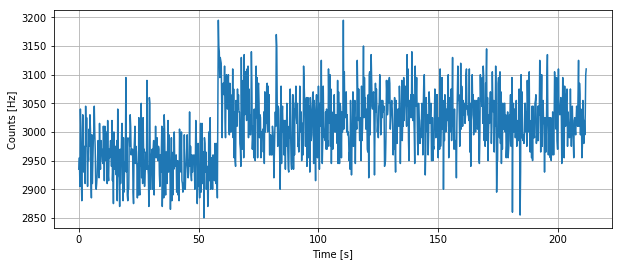

In [11]:
cird.load_data(dwell_time=dwell_time, show_plot=True)

In [12]:
cird.level_background(npts=npts, sensitivity=sensitivity,
                      beam_start_time=beam_start_time, beam_stop_time=beam_stop_time)

Estimated beam stop time: 120


In [13]:
cird.integrate_area()

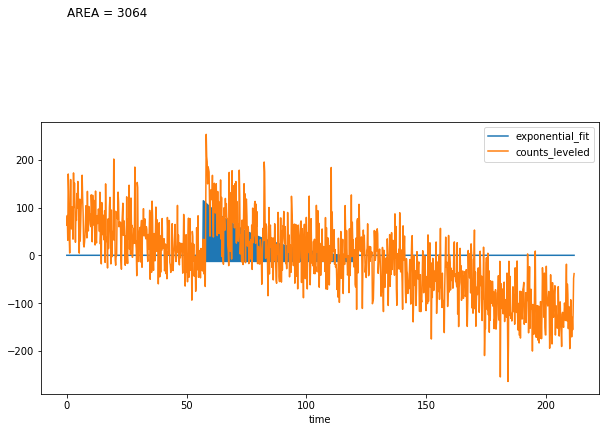

3063.665749157808

In [14]:
cird.fit_area(area_high=area_high, show_plot=True)